In [70]:
import scipy as sci

import numpy as np

import matplotlib.pyplot as plt

from scipy.io.wavfile import write

In [71]:
# need to write something that maps a string of notes:

# ref: https://pypi.org/project/playsound/
# https://towardsdatascience.com/mathematics-of-music-in-python-b7d838c84f72
# https://github.com/weeping-angel/Mathematics-of-Music

# C major songs
# C - D - E - F - G - A - B

# randomly generate a digit from 1 through 7


In [72]:
m = 4 #number of measures
l_ints = m*4

ints = np.random.randint(0,7,l_ints) # rand ints length of the measures
np.max(ints)
print(ints)



[4 0 4 4 1 6 1 1 6 0 1 5 1 3 3 5]


In [73]:
#convert ints to strings
notes = ['a','b','c','d','e','f','g']
print(notes)

['a', 'b', 'c', 'd', 'e', 'f', 'g']


In [74]:
notes[0]

'a'

In [75]:
#mel = ''

#for i in range(l_ints):
    
#    print(notes[ints[i]])
    
#    mel = mel + notes[ints[i]]

In [76]:
print(mel)

aggffbdbfbcbffbc


In [77]:
# frequencies from middle C (C4)
# https://pages.mtu.edu/~suits/notefreqs.html

# frequency (Hz) and wavelength (cm)

# A3 - 220.00, 156.82
# B3 - 246.94, 139.71 
# C4 - 261.63, 131.87
# D4 - 293.66, 117.48
# E4 - 329.63, 104.66
# F4 - 349.23, 98.79
# G4 - 392.00, 88.01


In [78]:
# https://pages.mtu.edu/~suits/Physicsofmusic.html

# simplest model of musical sound, sign wave
# https://amath.colorado.edu/pub/matlab/music/MathMusic.pdf

# wave equation: P = A sin (2*pi*f*t)
# P is pressure
# A is amplitude (corresponds to volume)
# f is frequency
# t is period

As = np.ones((l_ints)) #amplidule
fs = np.array([220.00,246.94,261.63,293.66,329.63,349.23,392.00])


In [79]:
# need to find a time interval to play the song, the wave switches to the form of the random note

# each note is 1 second

# time in seconds: 

t = l_ints

l_ts= 100000

t_note = 0.5

ts = np.arange(0,l_ts)/l_ts*(l_ints*t_note)

rate = int(l_ts/(l_ints*t_note))

print(rate)

12500


In [80]:
Ps = np.array([])
print(Ps)
np.pi

[]


3.141592653589793

In [81]:
#can I make this not a loop?

t0 = 0

# amplitude = np.iinfo(np.int16).max
# from https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html
A = 1

#for i in range(l_ts):
for i in range(l_ts):
    
    index = int(np.floor(ts[i]/t_note)) #this t_note was just added to use intervals other than 1 second, not sure if I divide or multiply
    #print(index)    
    n = ints[index]
    
    #print(n)
    
    f = fs[n]
    
    #print(f)
        
    Ps = np.append(Ps,A*np.sin(2*np.pi*f*ts[i]))

print(Ps)

[ 0.          0.16493303  0.32534847 ... -0.99924504 -0.97710372
 -0.92493015]


(4.0, 4.01)

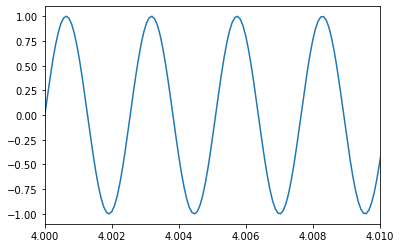

In [82]:
fig, ax = plt.subplots()  
ax.plot(ts, Ps)
ax.set_xlim(4, 4.01)

In [83]:
np.iinfo(np.int16).max

32767

In [84]:
# scipy.io.wavfile.write(filename, rate, data)

data = Ps * np.iinfo(np.int16).max/4

write("song3.wav", rate, data.astype(np.int16))